In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from Coord import ECEF, LLA

brdc_npy_path = Path(r"F:\sv_pos_test\sv_pos_brdc_2022_001_G.npy")

In [2]:
sat_pos_xyz = np.load(brdc_npy_path)
ground_pos = LLA([0,0,0])


xyz_arr = ECEF(sat_pos_xyz[:,-3:])
sat_pos_azel = ground_pos.calculate_azel(xyz_arr)

full_azel_arr = np.hstack([sat_pos_xyz[:,:3], sat_pos_azel])

full_azel_arr

Calculating azimuth and elevation for 92160 targets
0 / 92160
1000 / 92160
2000 / 92160
3000 / 92160
4000 / 92160
5000 / 92160
6000 / 92160
7000 / 92160
8000 / 92160
9000 / 92160
10000 / 92160
11000 / 92160
12000 / 92160
13000 / 92160
14000 / 92160
15000 / 92160
16000 / 92160
17000 / 92160
18000 / 92160
19000 / 92160
20000 / 92160
21000 / 92160
22000 / 92160
23000 / 92160
24000 / 92160
25000 / 92160
26000 / 92160
27000 / 92160
28000 / 92160
29000 / 92160
30000 / 92160
31000 / 92160
32000 / 92160
33000 / 92160
34000 / 92160
35000 / 92160
36000 / 92160
37000 / 92160
38000 / 92160
39000 / 92160
40000 / 92160
41000 / 92160
42000 / 92160
43000 / 92160
44000 / 92160
45000 / 92160
46000 / 92160
47000 / 92160
48000 / 92160
49000 / 92160
50000 / 92160
51000 / 92160
52000 / 92160
53000 / 92160
54000 / 92160
55000 / 92160
56000 / 92160
57000 / 92160
58000 / 92160
59000 / 92160
60000 / 92160
61000 / 92160
62000 / 92160
63000 / 92160
64000 / 92160
65000 / 92160
66000 / 92160
67000 / 92160
68000 / 9

array([[0.0000e+00, 1.0000e+00, 1.0000e+00, 2.8386e+02, 1.8550e+01],
       [3.0000e+01, 1.0000e+00, 1.0000e+00, 2.8411e+02, 1.8540e+01],
       [6.0000e+01, 1.0000e+00, 1.0000e+00, 2.8436e+02, 1.8540e+01],
       ...,
       [8.6310e+04, 1.0000e+00, 3.2000e+01, 9.3020e+01, 2.6330e+01],
       [8.6340e+04, 1.0000e+00, 3.2000e+01, 9.2760e+01, 2.6320e+01],
       [8.6370e+04, 1.0000e+00, 3.2000e+01, 9.2500e+01, 2.6310e+01]])

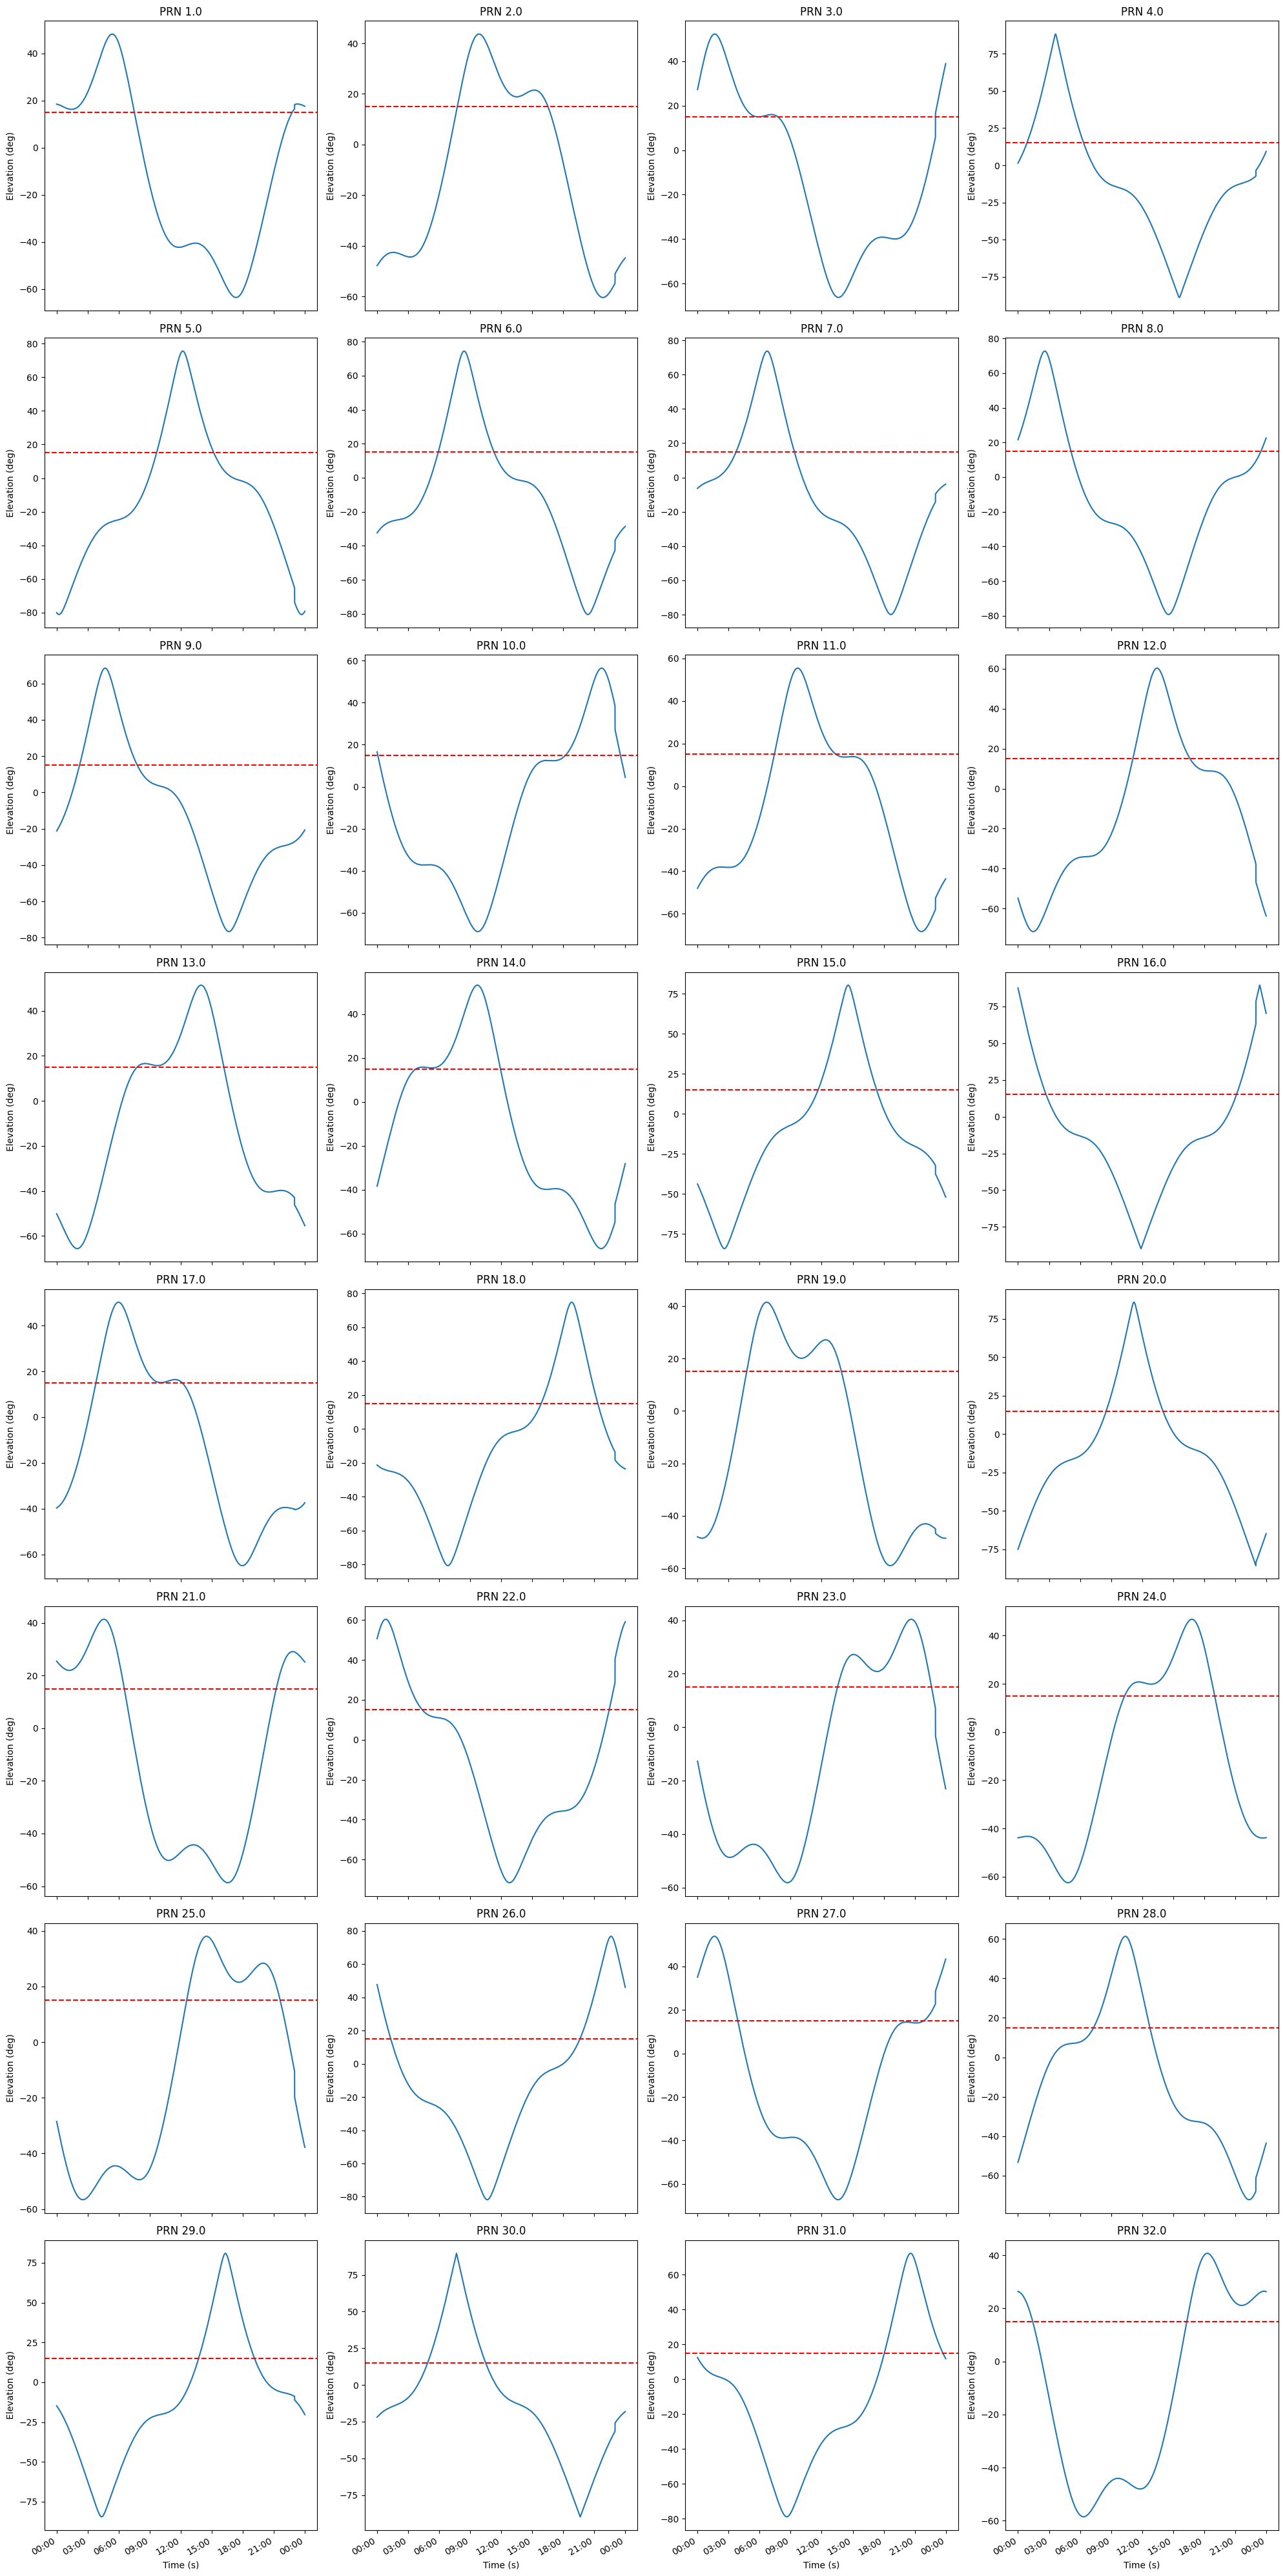

In [3]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Example data array, replace with your actual 'full_azel_arr'
# full_azel_arr = np.array([...])

unique_sats = np.unique(full_azel_arr[:, 2])
start_of_day = datetime.combine(datetime.today(), datetime.min.time())

# Calculate the number of rows needed for the subplots
num_rows = (len(unique_sats) + 3) // 4  # Each row will have up to 4 subplots

fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # Adjust figure size as needed

for idx, prn in enumerate(unique_sats):
    prn_arr = full_azel_arr[full_azel_arr[:, 2] == prn]
    seconds_of_day = prn_arr[:, 0]
    times = [start_of_day + timedelta(seconds=int(s)) for s in seconds_of_day]

    # Locate subplot position
    ax = axs[idx // 4, idx % 4]
    ax.plot(times, prn_arr[:, -1])
    ax.set_title(f"PRN {prn}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Elevation (deg)")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.axhline(15, color='r', linestyle='--')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()



In [4]:
# determine when sats come into view


unique_sats = np.unique(full_azel_arr[:, 2])
start_of_day = datetime.combine(datetime.today(), datetime.min.time())


prn = 32

prn_arr = full_azel_arr[full_azel_arr[:, 2] == prn]

# where elevation is above 15 degrees

mask = prn_arr[:, -1] > 15
above_horizon

print(cross_points)



NameError: name 'above_horizon' is not defined

In [5]:
# polar sky plots
from plotly import graph_objects as go


for prn in unique_sats:
    prn_arr = full_azel_arr[full_azel_arr[:,2] == prn]

    fig = go.Figure()



    el_values_mask = prn_arr[:, -1] <= 15

    prn_above = prn_arr[~el_values_mask]
    prn_below = prn_arr[el_values_mask]

    times_above = prn_above[:,0]


    fig.add_trace(go.Scatterpolar(
        r=prn_above[:,-1],
        theta=prn_above[:,-2],
        mode='markers',
        text=prn_above[:,0]
    ))

    fig.add_trace(go.Scatterpolar(
        r=prn_below[:,-1],
        theta=prn_below[:,-2],
        mode='markers',
        # line_dash='dash',
        name=f'PRN {prn}',
        text=prn_above[:,0]
    ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[90, 0],  # change this to your desired range
        ),
    ),
)

fig.show()

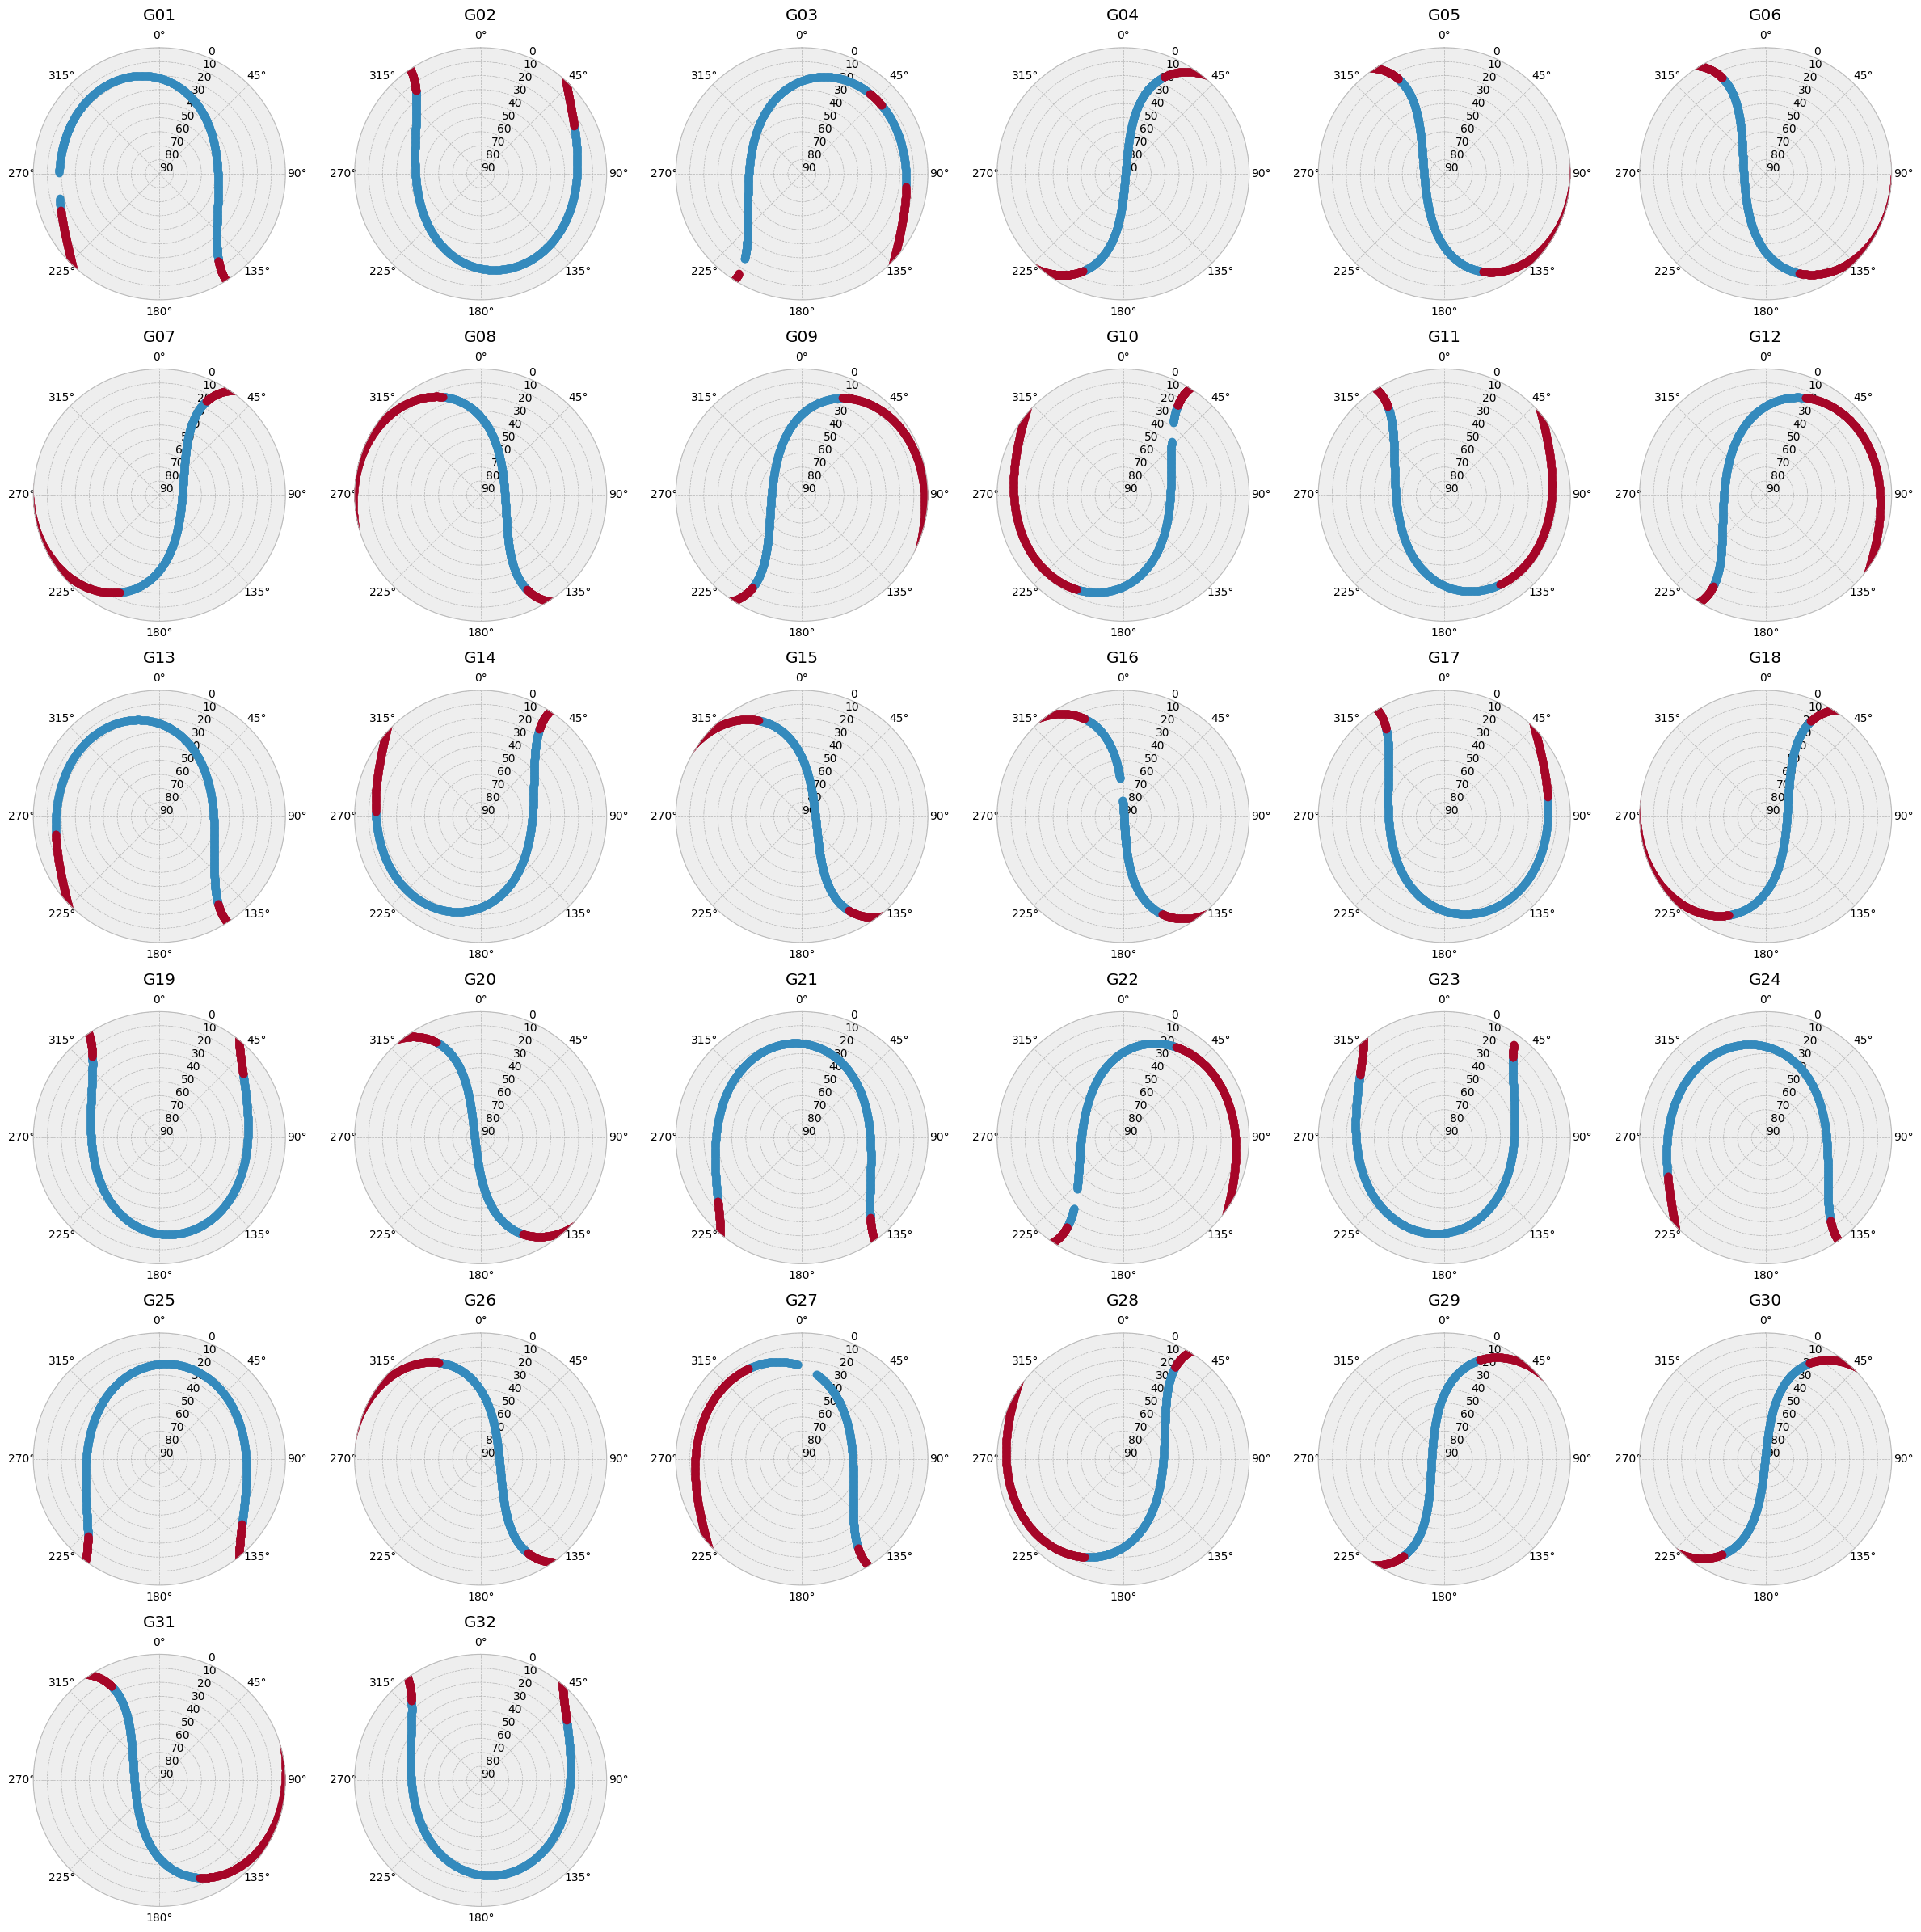

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist import Subplot
from matplotlib.projections import PolarAxes
import numpy as np
from matplotlib.transforms import Affine2D
import matplotlib.markers as mmarkers

from matplotlib.style import use
use('bmh')

# Define the number of columns
num_columns = 6
# Calculate the number of rows needed
num_rows = int(np.ceil(len(unique_sats) / num_columns))

# Create a figure object
fig = plt.figure(figsize=(4 * num_columns, 4 * num_rows))

# Create a PolarAxes subplot for each satellite
for idx, prn in enumerate(unique_sats, start=1):
    prn_arr = full_azel_arr[full_azel_arr[:, 2] == prn]

    el_values_mask = prn_arr[:, -1] <= 15
    prn_above = prn_arr[~el_values_mask]
    prn_below = prn_arr[el_values_mask]

    # Calculate the position for the current subplot
    ax = fig.add_subplot(num_rows, num_columns, idx, projection='polar')
    fig.add_subplot(ax)

    # Plot data for PRN above the elevation mask
    ax.plot(np.radians(prn_above[:, -2]), prn_above[:, -1], 'o', label=f'PRN {prn} Above')
    ax.plot(np.radians(prn_below[:, -2]), prn_below[:, -1], 'o', label=f'PRN {prn} Below')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_ylim(90,0)

    # Optional: Set title for each subplot
    ax.set_title(f'G{int(prn):02d}', va='bottom')

# Optional: Adjust layout to prevent overlapping
plt.tight_layout()

# Show the figure
plt.show()

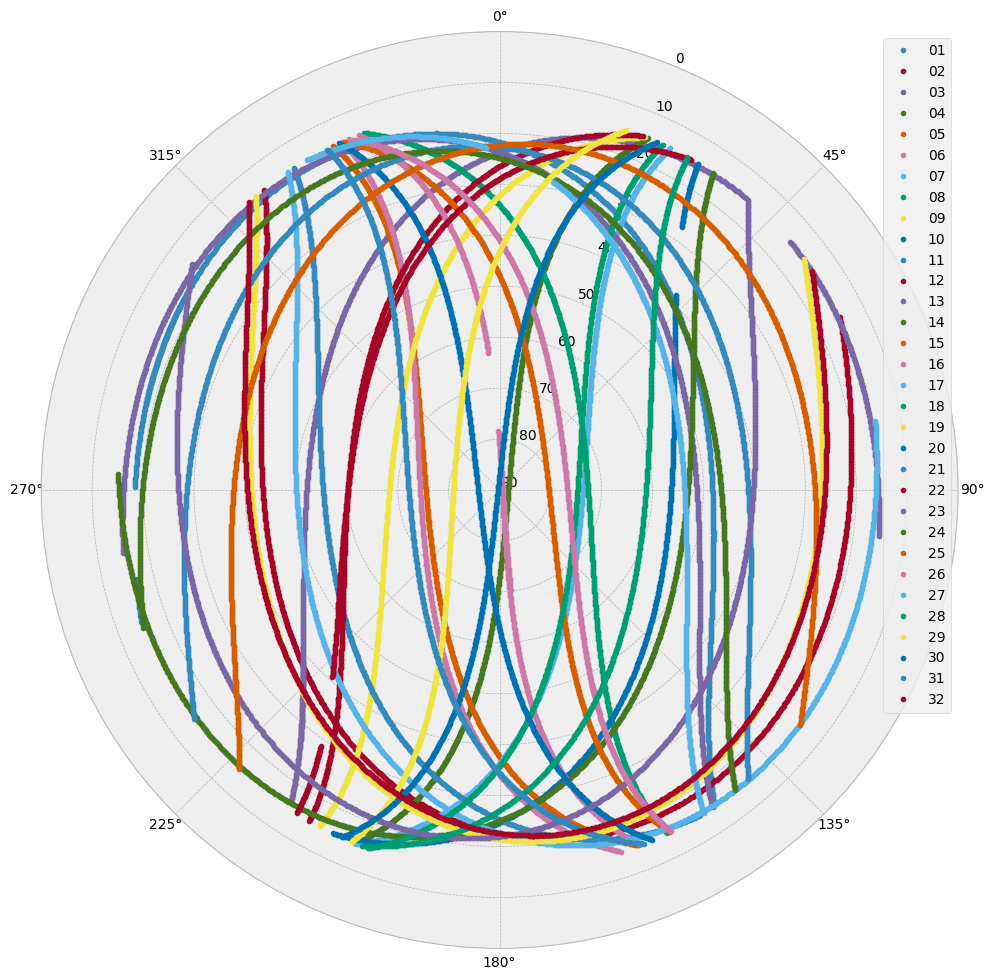

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Affine2D
import matplotlib.markers as mmarkers
from matplotlib.style import use

use('bmh')  # Applying the 'bmh' style for better aesthetics

# Assuming unique_sats and full_azel_arr are defined here
# ...

# Create a figure object with a larger singular subplot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot data for each satellite
for prn in unique_sats:
    prn_arr = full_azel_arr[full_azel_arr[:, 2] == prn]  # Adjust indexing based on your data structure

    el_values_mask = prn_arr[:, -1] <= 15  # Assuming last column is elevation
    prn_above = prn_arr[~el_values_mask]
    prn_below = prn_arr[el_values_mask]

    # Plot data for PRN above and below the elevation mask
    ax.plot(np.radians(prn_above[:, -2]), prn_above[:, -1], '.', label=f'{int(prn):02d}')

# Set the polar plot properties
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_ylim([90, 0])

# Optional: Adding a legend if needed
ax.legend(loc='upper right')

# Adjust layout to prevent overlapping of elements
plt.tight_layout()

# Show the figure
plt.show()


In [8]:


import plotly.graph_objects as go

# Assuming unique_sats and full_azel_arr are defined here
# ...

# Create a new figure with polar layout
fig = go.Figure()

# Plot data for each satellite
for prn in unique_sats:
    prn_arr = full_azel_arr[full_azel_arr[:, 2] == prn]  # Adjust indexing based on your data structure
    
    el_values_mask = prn_arr[:, -1] <= 15  # Assuming last column is elevation
    prn_above = prn_arr[~el_values_mask]
    prn_below = prn_arr[el_values_mask]
    
    # Adding scatter plot for satellite data above the elevation mask
    fig.add_trace(go.Scatterpolar(
        r=prn_above[:, -1],
        theta=np.degrees(prn_above[:, -2]),
        mode='markers',
        name=f'PRN {int(prn):02d} Above',
        marker=dict(symbol='circle')
    ))
# Update the layout to adjust the polar plot properties
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[90, 0]  # Assuming you want to show from center to outer
        ),
        angularaxis=dict(
            direction='clockwise',
            # theta0=90  # Setting North as the zero angle
        )
    ),
    title="Satellite Visibility",
    legend_title="Satellite PRN"
)

# Show the figure
fig.show()



In [9]:
import numpy as np
import plotly.graph_objects as go

# Assuming unique_sats and full_azel_arr are defined here
# full_azel_arr structure: [epoch, azimuth, elevation, prn]

def plot_for_epoch(epoch_selected, unique_sats, full_azel_arr):
    traces = []
    filtered_data = full_azel_arr[full_azel_arr[:, 0] == epoch_selected]

    # Plot data for each satellite
    for prn in unique_sats:
        prn_arr = filtered_data[filtered_data[:, 2] == prn]
        el_values_mask = prn_arr[:, -2] <= 15
        prn_above = prn_arr[~el_values_mask]

        trace = go.Scatterpolar(
            r= prn_above[:, -1],
            theta=prn_above[:, -2],
            mode='markers',
            name=f'G{int(prn):02d}',
            marker=dict(symbol='circle')
        )
        traces.append(trace)
    return traces

# Initial Plot
unique_epochs = np.unique(full_azel_arr[:, 0])
fig = go.Figure()

# Preparing frames for each epoch
frames = []
for epoch in unique_epochs[::20]:
    frame_traces = plot_for_epoch(epoch, unique_sats, full_azel_arr)
    frames.append(go.Frame(data=frame_traces, name=str(epoch)))

# Set up the initial state of the figure with the first epoch's data
fig.add_traces(frames[0].data)

# Play and pause buttons
updatemenus = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 10, "redraw": True}, "fromcurrent": True, "transition": {"duration": 10, "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

# Configure the slider
sliders = [dict(
    steps=[
        dict(method='animate',
             args=[[f.name], {'frame': {'duration': 5, 'redraw': True}, 'mode': 'immediate', 'fromcurrent': True}],
             label=str(f.name))
        for f in frames],
    transition={'duration': 1},
    x=0,  # Slider starting position
    y=0,  # Slider starting position
    currentvalue={'visible': True, 'prefix': 'Epoch: '}
)]

fig.update_layout(
    sliders=sliders,
    updatemenus=updatemenus,
    polar=dict(
        radialaxis=dict(visible=True, range=[90, 0]),
        angularaxis=dict(direction='clockwise')
    ),
    title=f"Satellite Visibility for Epoch {str(unique_epochs[0])}",  # Initial title
    legend_title="Satellite PRN",
)

# Update layout with frames
fig.frames = frames

# Show the figure
fig.show()
